<a href="https://colab.research.google.com/github/reguelpangrib29/prak-ai-2217051084-reguel-a/blob/main/AbsensiPertemuan/2217051084_Reguel_Andreas_Agustinus_Pangaribuan_AI_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

Decision Tree adalah salah satu algoritma dalam machine learning yang digunakan untuk memprediksi nilai target dengan mempelajari aturan keputusan yang terdapat dalam data. Struktur decision tree mirip dengan struktur pohon yang terdiri dari simpul akar, simpul internal, dan simpul daun. Setiap simpul internal mewakili keputusan berdasarkan fitur - fitur dari data, sedangkan simpul daun mewakili nilai prediksi atau kelas.

## Library

In [43]:
# Mengimport library pandas dan mengaliasnya sebagai pd
import pandas as pd

# Mengimport library numpy dan mengaliasnya sebagai np
import numpy as np

# Mengimport DecisionTreeClassifier dari modul tree dalam library sklearn
from sklearn.tree import DecisionTreeClassifier

# Mengimport accuracy_score dari modul metrics dalam library sklearn
from sklearn.metrics import accuracy_score

# Mengabaikan warning yang muncul saat menjalankan kode
import warnings
warnings.filterwarnings("ignore")

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [45]:
# Menggunakan pandas untuk membaca file CSV dari URL dan menyimpannya dalam DataFrame df
df = pd.read_csv("https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/daily_weather_prediction.csv")

# Menampilkan seluruh isi DataFrame df
df

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000
...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,38.180000
1091,1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,73.340000
1092,1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,52.310000
1093,1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,58.280000


## EDA (Exploratory Data Analysis)

EDA adalah singkatan dari Exploratory Data Analysis. Ini adalah proses yang digunakan oleh data scientist atau data analis untuk memahami dataset yang diberikan sebelum memulai proses pemodelan atau analisis lebih lanjut.

Beberapa tujuan dari EDA antara lain :

1. Memahami struktur data : EDA membantu
   dalam memahami bagaimana data terstruktur, jumlah kolom dan baris, tipe data, serta apakah ada missing value atau tidak.

2. Analisis Deskriptif : EDA digunakan
   untuk melakukan analisis deskriptif, seperti statistik ringkasan, visualisasi, dan distribusi data. Ini membantu dalam mendapatkan pemahaman awal tentang karakteristik data, seperti tendensi sentral, dispersi, dan pola - pola dalam data.

3. Identifikasi Outlier : EDA membantu
   dalam mengidentifikasi outlier atau pencilan yang mungkin ada dalam data, yang dapat mempengaruhi analisis atau pemodelan yang dilakukan.

4. Eksplorasi Hubungan Antara Variabel :
   EDA memungkinkan untuk menjelajahi hubungan antara variabel dalam dataset. Ini termasuk korelasi antar variabel, pengaruh satu variabel terhadap variabel lain, dan pola-pola lainnya.

5. Persiapan Data : Selama proses EDA,
   data juga bisa dipersiapkan untuk proses analisis atau pemodelan berikutnya. Ini termasuk penghapusan missing value, normalisasi data, atau transformasi variabel.

Tujuan Utama dari EDA adalah untuk mendapatkan pemahaman yang mendalam tentang data yang akan dianalisis, sehingga dapat membuat keputusan yang lebih baik tentang langkah - langkah analisis atau pemodelan selanjutnya.



In [27]:
# Menampilkan informasi tentang DataFrame df, termasuk jumlah baris dan kolom, tipe data setiap kolom,
# serta jumlah nilai non-null dan penggunaan memori
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  1095 non-null   int64  
 1   air_pressure_9am        1092 non-null   float64
 2   air_temp_9am            1090 non-null   float64
 3   avg_wind_direction_9am  1091 non-null   float64
 4   avg_wind_speed_9am      1092 non-null   float64
 5   max_wind_direction_9am  1092 non-null   float64
 6   max_wind_speed_9am      1091 non-null   float64
 7   rain_accumulation_9am   1089 non-null   float64
 8   rain_duration_9am       1092 non-null   float64
 9   relative_humidity_9am   1095 non-null   float64
 10  relative_humidity_3pm   1095 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 94.2 KB


In [28]:
# Menggunakan method isnull() untuk mengecek keberadaan nilai null dalam DataFrame df,
# kemudian menggunakan method sum() untuk menghitung jumlah nilai null pada setiap kolom
df.isnull().sum()

number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [29]:
# Menggunakan method describe() untuk mendapatkan ringkasan statistik dari data numerik dalam DataFrame df
df.describe()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
count,1095.000000,1092.000000,1090.000000,1091.000000,1092.000000,1092.000000,1091.000000,1089.000000,1092.000000,1095.000000,1095.000000
mean,547.000000,918.882551,64.933001,142.235511,5.508284,148.953518,7.019514,0.203079,294.108052,34.241402,35.344727
std,316.243577,3.184161,11.175514,69.137859,4.552813,67.238013,5.598209,1.593952,1598.078779,25.472067,22.524079
min,0.000000,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,6.090000,5.300000
25%,273.500000,916.550000,57.281000,65.972506,2.248768,76.553003,3.067477,0.000000,0.000000,15.092243,17.395000
50%,547.000000,918.921045,65.715479,166.000000,3.871333,177.300000,4.943637,0.000000,0.000000,23.179259,24.380000
75%,820.500000,921.160073,73.450974,191.000000,7.337163,201.233153,8.947760,0.000000,0.000000,45.400000,52.060000
max,1094.000000,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,92.620000,92.250000


<Axes: >

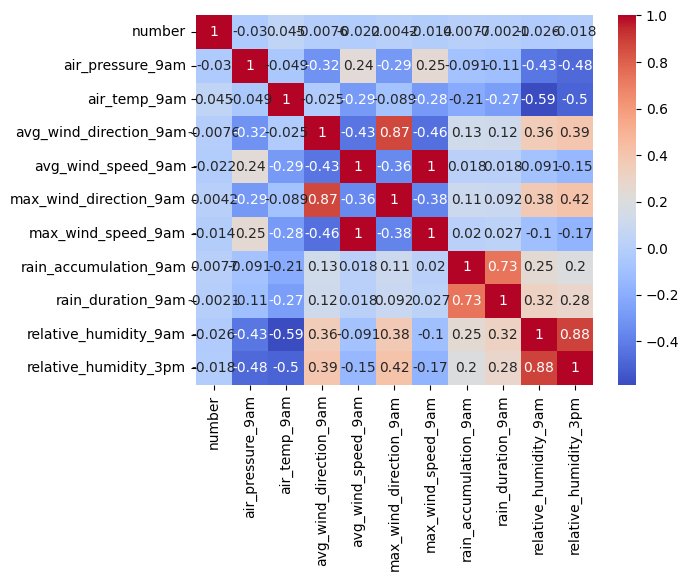

In [46]:
# Visualization bar
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

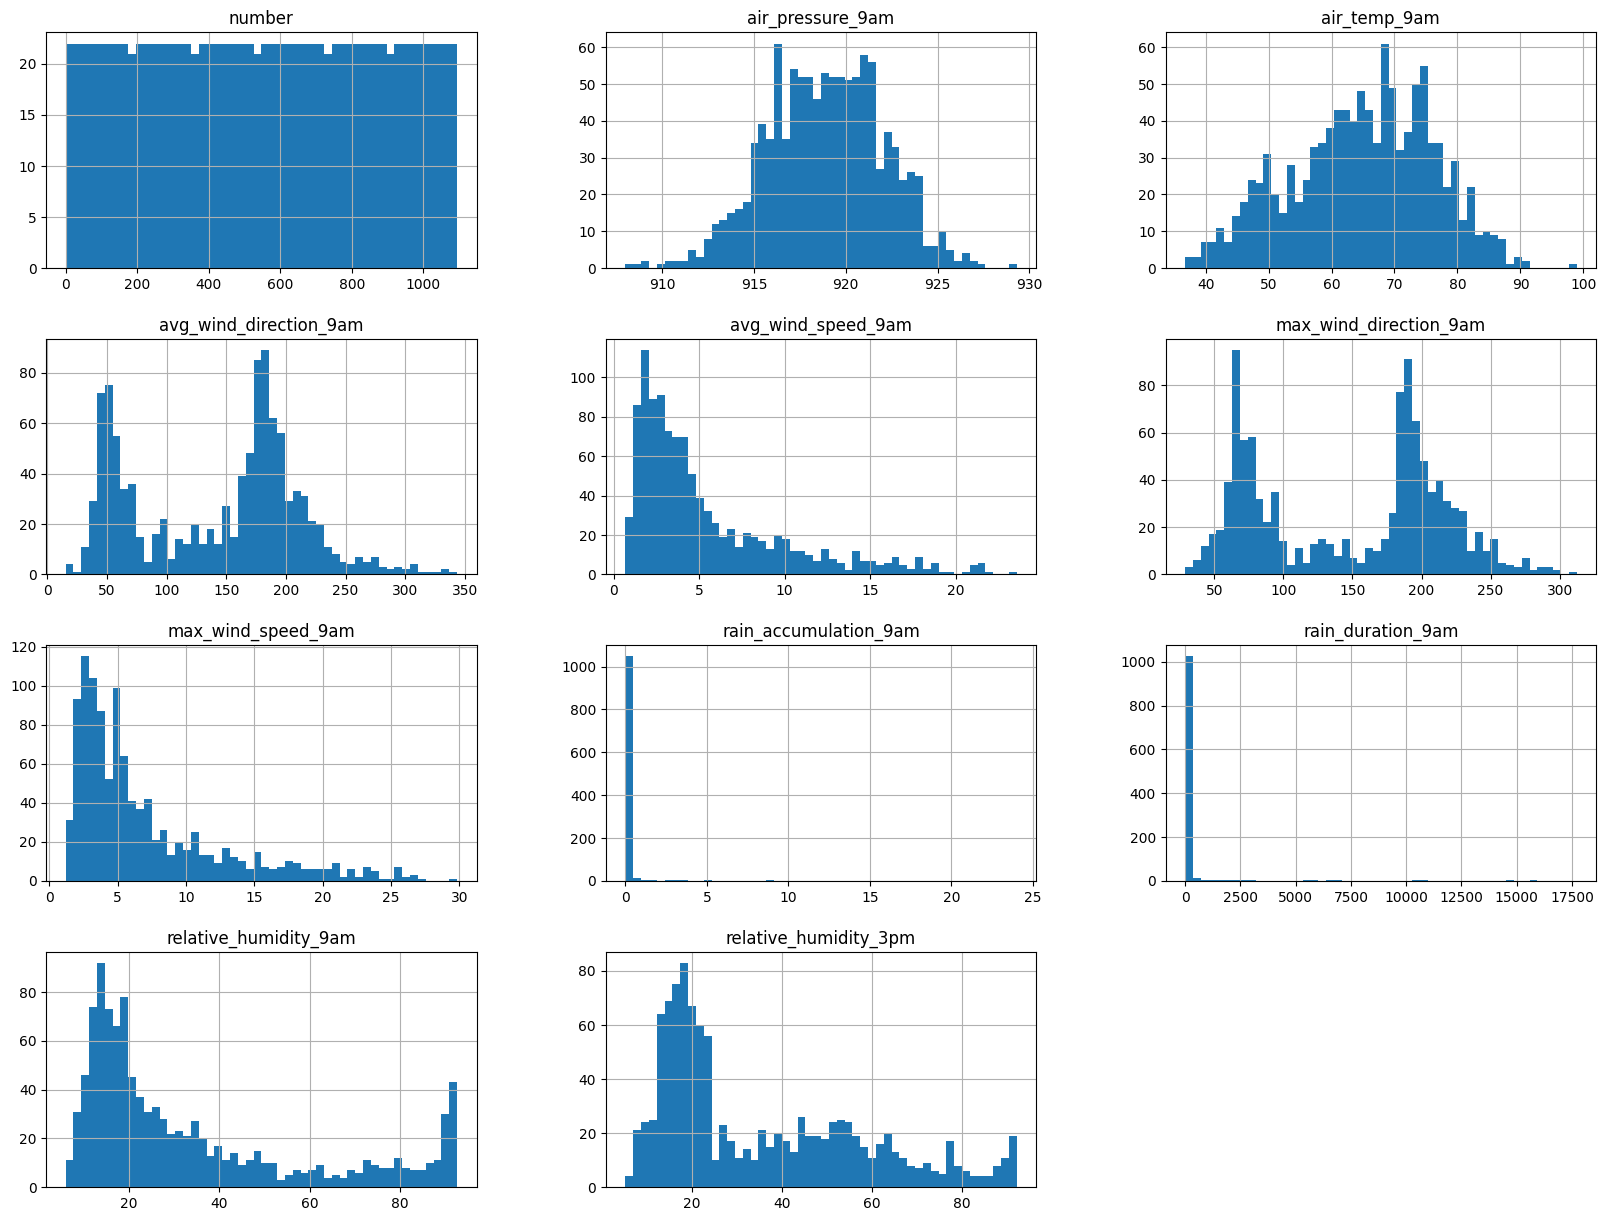

In [47]:
# Plot the histogram for each variable
df.hist(bins=50, figsize=(20,15))
plt.show()

## Preprocessing

In [30]:
# Menggunakan method dropna() untuk menghapus baris yang mengandung nilai null dari DataFrame df
# dan menyimpan DataFrame yang telah dimodifikasi kembali ke variabel df
df = df.dropna()

In [31]:
# Menambahkan kolom baru 'high_humidity_label' ke Dataframe df
# Nilai dalam kolom ini akan diisi dengan 1 jika nilai 'relative_humidity_3pm' pada baris tersebut lebih besar dari 24.99, dan 0 jika tidak
df['high_humidity_label'] = (df['relative_humidity_3pm'] > 24.99) * 1

In [32]:
# Mendapatkan list nama - nama kolom dari DataFrame df
features = list(df.columns)

# Menghapus kolom 'number' dari list fitur
features.remove('number')

# Menghapus kolom 'relative_humidity_9am' dari list fitur
features.remove('relative_humidity_9am')

# Menghapus kolom 'high_humidity_label' dari list fitur
features.remove('high_humidity_label')

# Menampilkan list fitur yang telah dimodifikasi
features

['air_pressure_9am',
 'air_temp_9am',
 'avg_wind_direction_9am',
 'avg_wind_speed_9am',
 'max_wind_direction_9am',
 'max_wind_speed_9am',
 'rain_accumulation_9am',
 'rain_duration_9am',
 'relative_humidity_3pm']

In [33]:
# Memilih subset dari DataFrame df yang hanya terdiri dari fitur - fitur yang telah dipersiapkan sebelumnya
X = df[features].copy()

# Memilih kolom 'high_humidity_label' dari DataFrame df sebagai target variabel yang akan diprediksi
y = df["high_humidity_label"].copy()

In [34]:
# Menghitung indeks yang akan digunakan untuk membagi data menjadi data pelatihan dan data pengujian.
# Indeks ini dihitung sebagai 80% dari panjang data X.
train_pct_index = int(0.95 * len(X))

# Memisahkan data X menjadi dua bagian: data pelatihan (X_train) dan data pengujian (X_test).
# Bagian pertama dari X sampai indeks train_pct_index akan digunakan sebagai data pelatihan.
# Bagian dari indeks train_pct_index sampai akhir akan digunakan sebagai data pengujian.
X_train, X_test = X[:train_pct_index], X[train_pct_index:]

# Memisahkan data y (target variabel) menjadi dua bagian: data pelatihan (y_train) dan data pengujian (y_test).
# Prosesnya serupa dengan membagi data X.
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

## Modeling

In [35]:
# Membuat objek DecisionTreeClassifier dengan mengatur jumlah maksimum leaf nodes (simpul daun) menjadi 16
# dan menetapkan nilai random_state agar hasilnya dapat direproduksi dengan konsisten.
dt_cls = DecisionTreeClassifier(max_leaf_nodes=16, random_state=150)

# Melatih model DecisionTreeClassifier menggunakan data pelatihan yang telah dipersiapkan.
# Ini dilakukan dengan menggunakan metode fit(), di mana X_train adalah fitur-fitur pelatihan
# dan y_train adalah label pelatihan yang ingin diprediksi oleh model.
dt_cls.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=16, random_state=150)

## Evaluation

### Prediction

In [16]:
# Melakukan prediksi menggunakan model DecisionTreeClassifier yang telah dilatih sebelumnya
# pada data pengujian X_test. Ini dilakukan dengan menggunakan metode predict().
y_pred = dt_cls.predict(X_test)

# Menampilkan hasil prediksi yang disimpan dalam variabel y_pred
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [21]:
# Menghitung akurasi antara label yang sebenarnya (y_test) dan label yang diprediksi (y_pred)
acc = accuracy_score(y_test, y_pred)

# Menampilkan akurasi dalam bentuk persentase dengan dua angka desimal
print("Accuracy: %.2f%%" % (acc * 100))

Accuracy: 100.00%


## Conclusion

Dengan menggunakan model Decision Tree Classifier dengan batasan maksimum 16 leaf nodes, akurasi prediksi pada data pengujian yang saya dapat mencapai sukses 100.00%. Ini menunjukkan bahwa model tersebut dapat dengan tepat memprediksi label "high humidity" dengan tingkat keberhasilan mencapai 100.00% berdasarkan fitur - fitur yang telah dipilih.